# Exploratory Data Analysis (EDA) in Python

Popular Python libraries:
* pandas - used for data manipulation (preprocessing and storing data)
* numpy - 
* matplotlib - 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as plt

## Load the Dataset 
Link to dataset here: [120 years of Olympic history: athletes and results | Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/home)

In [2]:
data = pd.read_csv('OLYMPICS_athlete_events.csv')

## Basic EDA

In [3]:
# Use head() and tail() to inspect the first and last X rows of a dataset

# See the first 5 rows of this dataset
data.head(5)

# See the last 5 rows of this dataset
#data.tail(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Use shape to check the number of observations and variables we have in the data set
data.shape
# The data has 271116 rows x 15 columns

(271116, 15)

In [5]:
# Use info() for the information about the data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
# use the describe() function to get various summary statistics that exclude NaN values
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


#### Handling Missing Values
General Guidelines to handle missing values in a dataset (But each consider if your approach makes sense first!):
* DROP rows with missing values
* Substitute the missing value with the MEAN of the numerical column
* Substitute the missing value with the MEDIAN of the numerical column (use if: there are extreme outliers)
* Substitute the missing value with the MODE of the numerical column (use for: categorical columns)  

Be sure to check for outliers!

In [7]:
# Check for missing values
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
# DROP rows with at least one element missing
data.dropna()

# DROP rows with missing values in the specified columns
#data.dropna(subset = ['Age', 'Height', 'Weight'])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [9]:
# Replace missing values in the Age column (numerical) with MEAN
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [10]:
# Replace missing values in the Age column (numerical) with MEDIAN
data['Age'].fillna(data['Age'].median(), inplace=True)

In [11]:
# Replace missing values in the Season column (categorical) with MODE
data['Season'].fillna(data['Season'].mode(), inplace=True)

#### Handling Duplicate Values

In [12]:
# Check for duplicate values or rows
duplicate = data.duplicated()
print('There are', duplicate.sum(), 'duplicated values.')
data[duplicate]

There are 1385 duplicated values.


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [13]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [14]:
# Check for duplicates again
data.duplicated().sum()

0

#### Handling Outliers

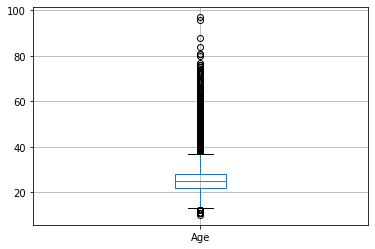

In [15]:
data.boxplot(column=['Age'])

## (Multi)variate Analysis
Analysis of variables in the dataset

In [16]:
# Create a correlation matrix for numerical values
data.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.002825,-0.011080,-0.009177,0.011381
Age,-0.002825,1.000000,0.137970,0.211840,-0.088250
Height,-0.011080,0.137970,1.000000,0.796230,0.047615
Weight,-0.009177,0.211840,0.796230,1.000000,0.019236
Year,0.011381,-0.088250,0.047615,0.019236,1.000000


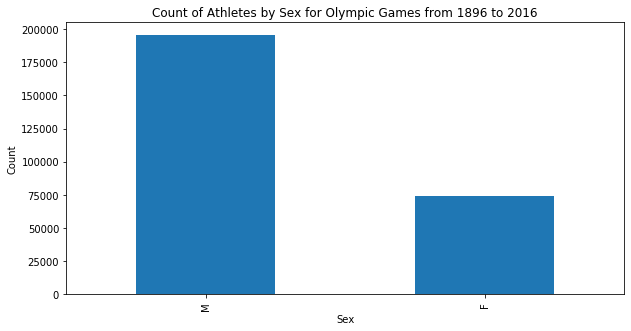

In [17]:
# Plotting a Histogram
data['Sex'].value_counts().plot(kind='bar', figsize=(10,5))
plt.pyplot.title('Count of Athletes by Sex for Olympic Games from 1896 to 2016')
plt.pyplot.ylabel('Count')
plt.pyplot.xlabel('Sex');

# Visualization Question Ideas
* According to this dataset, which countries have gained the most medals?
* What is the average age, height, and/or weight of a male/female Olympian?
* Which sports are the most popular among men? Among women?

[Exploratory Data Analysis(EDA) from Scratch | With Pythin Implementation](https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/)